In [31]:
import numpy as np
import pandas as pd
import requests
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import os
from sklearn.cluster import KMeans

In [32]:
# Single API endpoint providing all years' budget data
api_endpoint = 'http://127.0.0.1:5000/api/v1.0/poly_regress_rev/actual_vs_predicted/2014/2028'

# Fetch the data from the API
response = requests.get(api_endpoint)
response.raise_for_status()  # This will raise an exception for HTTP errors if any occur
data = response.json()

# Convert the JSON data to a DataFrame
# Assuming the JSON data includes a 'Year' field in each record
df = pd.DataFrame(data)

# Print the first few rows to verify data structure
print(df.head())

HTTPError: 403 Client Error: Forbidden for url: http://127.0.0.1:5000/api/v1.0/poly_regress_rev/actual_vs_predicted/2014/2028

In [33]:
# Select relevant numeric features for clustering
# You may need to exclude non-relevant columns such as IDs or descriptive text
features = df.select_dtypes(include=[np.number])  # This selects only numeric columns

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of each column
features = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


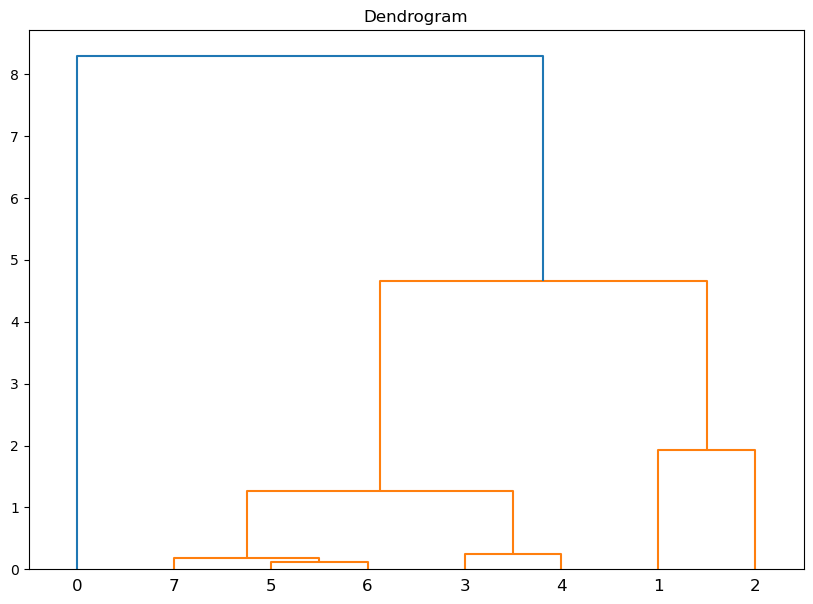

In [34]:
# Perform the clustering
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(features_scaled)

# Optionally, plot a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.show()

In [35]:
# Assuming 'features_scaled' is your dataset ready for clustering
import pickle

num_samples = features_scaled.shape[0]
max_clusters = min(num_samples - 1, 10)  # Ensuring we do not attempt too many clusters

for n_clusters in range(2, max_clusters + 1):  # Ensure at least two clusters
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(features_scaled)
    
    filename = f"cluster_models/cluster_model_Cluster{n_clusters}"
    with open(filename, "wb") as file:
        pickle.dump(clusterer, file)

    # Calculate and print the silhouette score
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6109483565736669
For n_clusters = 3 The average silhouette_score is : 0.5652104280864279
For n_clusters = 4 The average silhouette_score is : 0.45033701612103716
For n_clusters = 5 The average silhouette_score is : 0.4821650506569967
For n_clusters = 6 The average silhouette_score is : 0.3056855694527333
For n_clusters = 7 The average silhouette_score is : 0.07816023557199069


In [36]:
# Fit the final model
final_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
final_labels = final_cluster.fit_predict(features_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = final_labels

# Analyze clusters
for i in range(final_cluster.n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Summary:")
    print(cluster_data.describe())

Cluster 0 Summary:
       Revenue 2019(millions)  Revenue 2020(millions)  Revenue 2021(millions)  \
count                2.000000                 2.00000                 2.00000   
mean               377.990000               387.24000               407.56500   
std                231.478476               192.10677               168.59547   
min                214.310000               251.40000               288.35000   
25%                296.150000               319.32000               347.95750   
50%                377.990000               387.24000               407.56500   
75%                459.830000               455.16000               467.17250   
max                541.670000               523.08000               526.78000   

       Revenue 2022(millions)  Revenue 2023(millions)  Cluster  
count                2.000000                2.000000      2.0  
mean               450.090000              820.790000      0.0  
std                229.823846              133.940166   

Column Revenue 2014(millions) not found in DataFrame.
Column Revenue 2015(millions) not found in DataFrame.
Column Revenue 2016(millions) not found in DataFrame.
Column Revenue 2017(millions) not found in DataFrame.
Column Revenue 2018(millions) not found in DataFrame.


/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

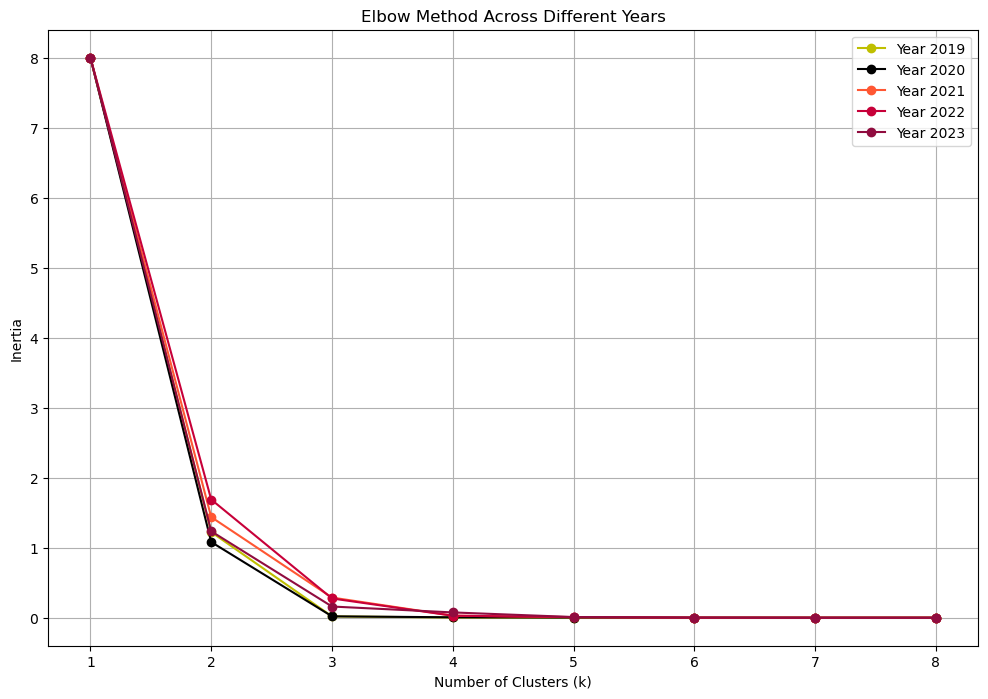

In [45]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#C70039', '#900C3F']

scaler = StandardScaler()
plt.figure(figsize=(12, 8))

for year, color in zip(years, colors):
    column_name = f'Revenue {year}(millions)'
    if column_name not in df.columns:
        print(f"Column {column_name} not found in DataFrame.")
        continue

    current_year_data = df[column_name].dropna().values.reshape(-1, 1)
    if current_year_data.size == 0:
        print(f"No data available for year {year}. Skipping...")
        continue

    current_year_data_scaled = scaler.fit_transform(current_year_data)
    num_samples = len(current_year_data_scaled)
    max_k = min(num_samples, 10)
    inertias = []
    k_values = range(1, max_k + 1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(current_year_data_scaled)
        inertias.append(kmeans.inertia_)

    plt.plot(k_values, inertias, marker='o', color=color, label=f'Year {year}')

plt.title('Elbow Method Across Different Years')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
colors = colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#C70039', '#900C3F']  # Define a list of colors for different years

# Ensure data is scaled properly for each year
scaler = StandardScaler()

for idx, year in enumerate(years):
    # Create a figure for each year inside the loop
    plt.figure(figsize=(8, 6))

    # Select the column for the current year and drop NA values
    current_year_data = df[f'Revenue {year}(millions)'].dropna().values.reshape(-1, 1)
    if current_year_data.size == 0:
        print(f"No data available for year {year}. Skipping...")
        continue  # Skip this year if there is no data
    
    current_year_data_scaled = scaler.fit_transform(current_year_data)

    # Dynamically adjust the range of k based on the number of samples
    num_samples = len(current_year_data_scaled)
    max_k = min(num_samples, 10)  # Maximum number of clusters is the lesser of num_samples or 10

    inertias = []
    k_values = range(1, max_k + 1)  # Adjust range to ensure k does not exceed number of samples
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(current_year_data_scaled)
        inertias.append(kmeans.inertia_)

    # Plotting the inertia graph for each year
    plt.plot(k_values, inertias, marker='o', color=colors[idx % len(colors)])  # Use cycling colors list if needed
    plt.title(f'Elbow Method for Year {year}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


KeyError: 'Revenue 2014(millions)'

<Figure size 800x600 with 0 Axes>

In [40]:
# Example data generation (replace this with your actual data loading code)
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [41]:
# Setting the number of clusters to 4 for this example
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_scaled)

# Getting the cluster labels
cluster_labels = kmeans.labels_

# Getting the coordinates of cluster centers.
cluster_centers = kmeans.cluster_centers_



/Users/muskanmittal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
# Calculate silhouette score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.657


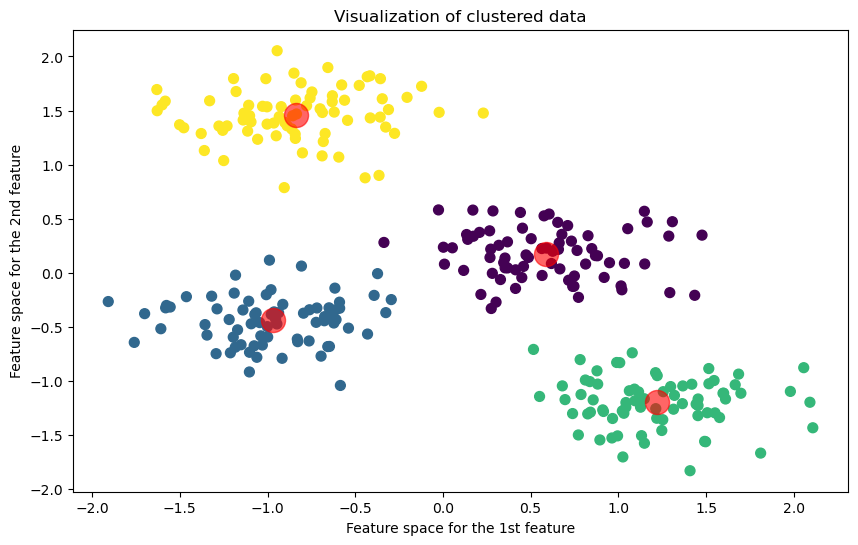

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6)  # plot centers
plt.title("Visualization of clustered data")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.show()